In [1]:
import pandas as pd
import scipy as sc
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [2]:
file = 'variant_12.csv'
df = pd.read_csv(file)
df.head()

couple_1_1   couple_1_2  couple_2_1  couple_2_2   couple_3_1  couple_3_2  \
0   -42.064261  2369.383024  430.032544  489.541308   960.532722 -482.230099   
1   515.859795  2607.669436  443.875301  449.828872 -1274.111757 -807.653467   
2  1568.309054  1292.004637  402.722283  464.494408   508.158373 -562.267136   
3  1671.534283  3114.005355  425.770646  415.899210   689.662914 -250.674551   
4  1730.358082  1901.817289  461.579657  423.093430   505.777083  442.280614   

    couple_4_1  couple_4_2   couple_5_1   couple_5_2   couple_6_1   couple_6_2  
0  -640.986988  341.337169  -511.273306  -471.045644  1754.506012   774.372959  
1   308.980542  -84.114722 -1174.976079  -408.696552  1980.230444   456.448674  
2   520.960667  504.835214   838.880344 -1075.093481    93.922717  1847.489317  
3  1876.065188 -338.758404 -1259.306587  -668.542047   462.085745   608.255591  
4 -1373.144538  551.354233   -88.936854  -988.380822   300.994137  1510.597897

## Проверка выборок на нормальность распределения

In [11]:
def hystogramma(selection: pd.core.series, name: str) -> None:
    """ Функция постоения гистограммы
    
    :param selection : выборка
    :param name      : название выборки
    """
    fig, ax = plt.subplots()
    sns.histplot(selection, kde=True, ax=ax, bins=15)
    plt.xlabel(name, size=15)
    plt.ylabel("frequency", size=15)
    plt.show()

In [39]:
def norm_check(selection: pd.core.series, name: str) -> None:
    """ Функция проверки выборки на нормальность распределения
    
    :param selection : выборка для проверки гипотезы
    """
    alpha = 0.05  # уровень значимости
    stat, p = sc.stats.shapiro(selection)
    hystogramma(selection, name)
    print("Static = %.3f, p-value = %.3f"%(stat, p))
    if p > alpha:
        print("Гипотеза не опровергается. Выборка имеет нормальное распределение.")
    else:
        print("Гипотеза опровергается. Выборка имеет ненормальное распределение")

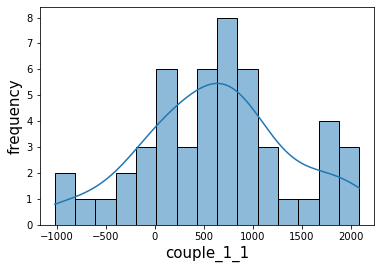

Static = 0.980, p-value = 0.550
Гипотеза не опровергается. Выборка имеет нормальное распределение.


In [40]:
norm_check(df['couple_1_1'], 'couple_1_1') 

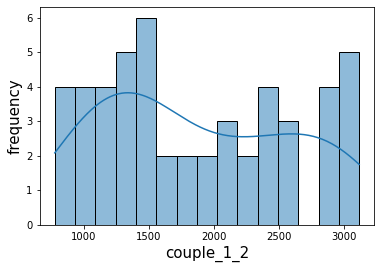

Static = 0.930, p-value = 0.006
Гипотеза опровергается. Выборка имеет ненормальное распределение


In [41]:
norm_check(df['couple_1_2'], 'couple_1_2')

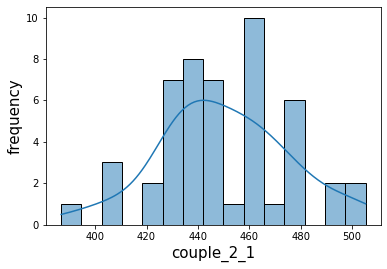

Static = 0.985, p-value = 0.762
Гипотеза не опровергается. Выборка имеет нормальное распределение.


In [42]:
norm_check(df['couple_2_1'], 'couple_2_1') 

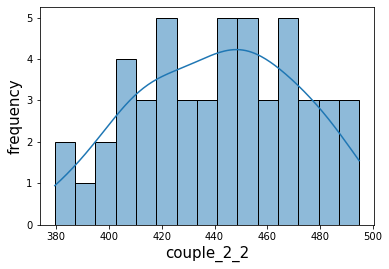

Static = 0.980, p-value = 0.532
Гипотеза не опровергается. Выборка имеет нормальное распределение.


In [43]:
norm_check(df['couple_2_2'], 'couple_2_2') 

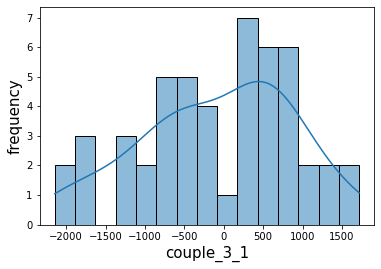

Static = 0.973, p-value = 0.296
Гипотеза не опровергается. Выборка имеет нормальное распределение.


In [44]:
norm_check(df['couple_3_1'], 'couple_3_1') 

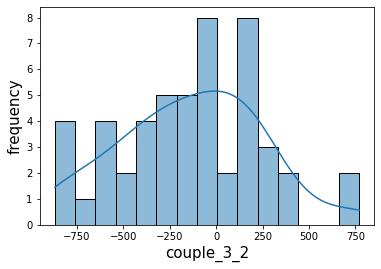

Static = 0.982, p-value = 0.633
Гипотеза не опровергается. Выборка имеет нормальное распределение.


In [45]:
norm_check(df['couple_3_2'], 'couple_3_2') 

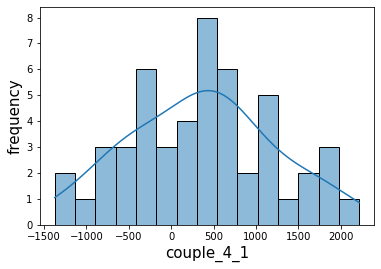

Static = 0.988, p-value = 0.888
Гипотеза не опровергается. Выборка имеет нормальное распределение.


In [46]:
norm_check(df['couple_4_1'], 'couple_4_1') 

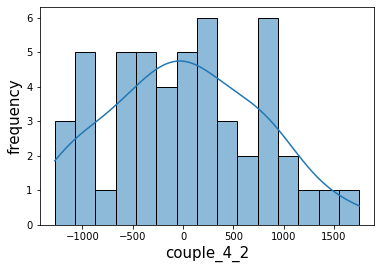

Static = 0.979, p-value = 0.519
Гипотеза не опровергается. Выборка имеет нормальное распределение.


In [47]:
norm_check(df['couple_4_2'], 'couple_4_2') 

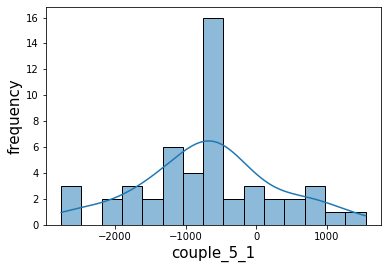

Static = 0.980, p-value = 0.540
Гипотеза не опровергается. Выборка имеет нормальное распределение.


In [48]:
norm_check(df['couple_5_1'], 'couple_5_1')

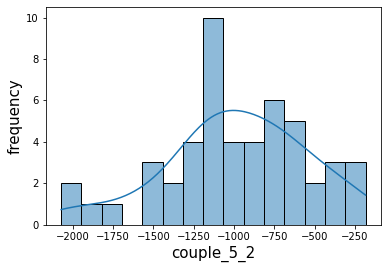

Static = 0.977, p-value = 0.418
Гипотеза не опровергается. Выборка имеет нормальное распределение.


In [49]:
norm_check(df['couple_5_2'], 'couple_5_2') 

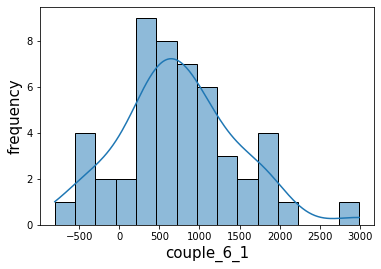

Static = 0.978, p-value = 0.475
Гипотеза не опровергается. Выборка имеет нормальное распределение.


In [50]:
norm_check(df['couple_6_1'], 'couple_6_1') 

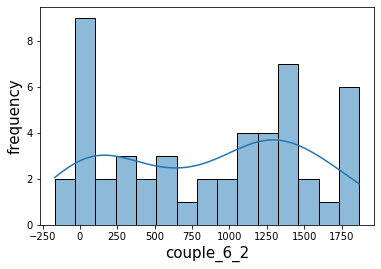

Static = 0.924, p-value = 0.003
Гипотеза опровергается. Выборка имеет ненормальное распределение


In [51]:
norm_check(df['couple_6_2'], 'couple_6_2') 

#### Итог: ненормальные распределения имеют выборки 1_2 и 6_2, для всех остальных гипотеза не опровергнута.

## Проверка гипотезы о равенстве дисперсий через Критерий Флингера-Киллина

In [57]:
def dispersia_check(selection_1: pd.core.series, selection_2: pd.core.series) -> None:
    """ Функция реализующая проверку о равенстве дисперсий через критерий Флингера-Киллина
    
    :param selection_1 : выборка для проверки гипотезы
    :param selection_2 : выборка для проверки гипотезы
    """
    a = 0.05 # уровень значимости
    stat, p = sc.stats.fligner(selection_1, selection_2, center = 'median')
    print("p-value = %.5f"%(p))
    if (p > a):
        print("Гипотеза о равенстве дисперсий не отклоняется")
    else:
        print("Гипотеза отклоняется. Дисперсии не равны")

In [37]:
dispersia_check(df['couple_1_1'],  df['couple_1_2']) 

p-value = 0.75132
Гипотеза о равенстве дисперсий не отклоняется


In [52]:
dispersia_check(df['couple_2_1'],  df['couple_2_2'])

p-value = 0.12939
Гипотеза о равенстве дисперсий не отклоняется


In [53]:
dispersia_check(df['couple_3_1'],  df['couple_3_2'])

p-value = 0.00000
Гипотеза отклоняется. Дисперсии не равны


In [54]:
dispersia_check(df['couple_4_1'],  df['couple_4_2'])

p-value = 0.33477
Гипотеза о равенстве дисперсий не отклоняется


In [55]:
dispersia_check(df['couple_5_1'],  df['couple_5_2'])

p-value = 0.00180
Гипотеза отклоняется. Дисперсии не равны


In [56]:
dispersia_check(df['couple_6_1'],  df['couple_6_2']) 

p-value = 0.95553
Гипотеза о равенстве дисперсий не отклоняется


#### Гипотеза о равестве дисперсий отклоняется для выборок 3_1 и 3_2, 5_1 и 5_2 или для couple_3 и couple_5 

## Провер гипотезы о равенстве двух выборочных средних (m1 = m2)

In [68]:
## Критерий Студента (Т-критерий) для выборок, имеющих нормальное распределение.
def student(selection_1: pd.core.series, selection_2: pd.core.series, equal: bool) -> None:
    """ Функция реализующая проверку гипотезы о равенстве двух выборочных средних,
    используя критерий Студента
    
    :param selection_1 : выборка для проверки гипотезы
    :param selection_2 : выборка для проверки гипотезы
    :param equal       : True - условие выполнения стандартного независимого теста на 2 выборки,
                         который предполагает равные отклонения совокупности.
                         False - условие выполнения t-критерия Уэлча, 
                         который не предполагает равной дисперсии популяции
    """
    a = 0.05
    stat, p = sc.stats.ttest_ind(selection_1, selection_2, equal_var = equal)
    print("p-value = %.5f"%(p))
    if (p > a):
        print("Гипотеза о равестве двух выборочных средних не отклоняется.")
    else:
        print("Гипотеза отклоняется. Выборочные средние не равны.")

In [69]:
## Критерием Манна – Уитни для выборок с ненормальным распределением
def manna_whitney(selection_1: pd.core.series, selection_2: pd.core.series) -> None:
    """ Функция реализующая проверку гипотезы о равенстве двух выборочных средних,
    используя критерий Манна-Уитни
    
    :param selection_1 : выборка для проверки гипотезы
    :param selection_2 : выборка для проверки гипотезы
    """
    a = 0.05
    stat, p = sc.stats.mannwhitneyu(selection_1, selection_2)
    print("p-value = %.5f"%(p))
    if (p > a):
        print("Гипотеза о равестве двух выборочных средних не отклоняется.")
    else:
        print("Гипотеза отклоняется. Выборочные средние не равны.")

### Для выборок с ненормальным распределением

In [70]:
manna_whitney(df['couple_1_1'], df['couple_1_2']) 

p-value = 0.00000
Гипотеза отклоняется. Выборочные средние не равны.


In [71]:
manna_whitney(df['couple_6_1'], df['couple_6_2'])

p-value = 0.16127
Гипотеза о равестве двух выборочных средних не отклоняется.


### Для выборок с нормальным распределением 

In [72]:
student(df['couple_2_1'], df['couple_2_2'], True) 

p-value = 0.12608
Гипотеза о равестве двух выборочных средних не отклоняется.


In [73]:
student(df['couple_3_1'], df['couple_3_2'], False) 

p-value = 0.74001
Гипотеза о равестве двух выборочных средних не отклоняется.


In [74]:
student(df['couple_4_1'], df['couple_4_2'], True) 

p-value = 0.03630
Гипотеза отклоняется. Выборочные средние не равны.


In [75]:
student(df['couple_5_1'], df['couple_5_2'], True) 

p-value = 0.03913
Гипотеза отклоняется. Выборочные средние не равны.


## Проверка гипотезы о равенстве дисперсий по критерию Фишера

In [77]:
def fisher(selection_1: pd.core.series, selection_2: pd.core.series) -> None:
    """ Функция реализующая проверку гипотезы о равенстве дисперсий по критерию Фишера
    
    :param selection_1 : выборка для проверки гипотезы
    :param selection_2 : выборка для проверки гипотезы
    """
    a = 0.05
    p = abs(np.mean(v1) - np.mean(v2))/(np.var(v1) + np.var(v2))
    print("p-value = %.5f" % (p))
    if (p > a):
        print("Гипотеза о равестве дисперсий не отклоняется")
    else:
        print("Гипотеза отклоняется. Выборочные дисперсии не равны.")

## Проверка гипотезы о равенстве выборочных дисперсий

In [80]:
def levene(*selection: pd.core.series) -> None:
    """ Функция реализующая проверку гипотезы о равенстве выборочных дисперсий 
    
    :param selection : выборки для проверки
    """
    a = 0.05
    stat, p = sc.stats.levene(*selection)
    print("p-value = %.5f"%(p))
    if (p > a):
        print("Гипотеза о равестве двух выборочных дисперсий не отклоняется.")
    else:
        print("Гипотеза отклоняется. Выборочные дисперсии не равны.")

In [81]:
levene(df['couple_1_1'], df['couple_1_2'], 
       df['couple_2_1'], df['couple_2_2'], 
       df['couple_3_1'], df['couple_3_2'], 
       df['couple_4_1'], df['couple_4_2'], 
       df['couple_5_1'], df['couple_5_2'], 
       df['couple_6_1'], df['couple_6_2'])

p-value = 0.00000
Гипотеза отклоняется. Выборочные дисперсии не равны.
